# Pattern Recognition Project

<img src="/work/Marca/Datans_Logo.png" alt="Drawing" style="width: 300px;"/>

Daniel Fragoso Alvarado, Jesús Enrique Gómez Martínez \& Hugo Rangel Ramírez.

In [ ]:
#Install some libraries that we will use later
! pip install umap-learn

     |████████████████████████████████| 88 kB 2.9 MB/s 
     |████████████████████████████████| 3.3 MB 48.5 MB/s 
     |████████████████████████████████| 1.1 MB 9.8 MB/s 
     |████████████████████████████████| 34.5 MB 34.3 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82819 sha256=cfe38f58c94df4717beaa9e269c85e630e17d075cdd658d75a30fe70598c9e54
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54273 sha256=c5583577f2770dea7017af58bfda1b87f6e223a2a50fe89eac633bec9925a407
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
Successfully built umap-learn pynndescent
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
!pip install kmodes

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import numpy as np
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#sns.style("whitegrid")
style.use("seaborn-whitegrid")
import umap

from sklearn.neighbors import KNeighborsClassifier

/shared-libs/python3.7/py/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

Loading data

In [ ]:
data = pd.read_csv('/work/Data/phones_data.csv')
data = data[['brand_name', 'model_name', 'os', 'popularity',
       'best_price', 'lowest_price', 'highest_price', 'sellers_amount',
       'screen_size', 'memory_size', 'battery_size', 'release_date']]
data

brand_name                                    model_name       os  \
0          ALCATEL          1 1/8GB Bluish Black (5033D-2JALUAA)  Android   
1          ALCATEL  1 5033D 1/16GB Volcano Black (5033D-2LALUAF)  Android   
2          ALCATEL  1 5033D 1/16GB Volcano Black (5033D-2LALUAF)  Android   
3          ALCATEL  1 5033D 1/16GB Volcano Black (5033D-2LALUAF)  Android   
4            Nokia                           1.3 1/16GB Charcoal  Android   
...            ...                                           ...      ...   
1219         Apple               iPhone XS Max 64GB Gold (MT522)      iOS   
1220         Apple      iPhone XS Max Dual Sim 64GB Gold (MT732)      iOS   
1221        HUAWEI              nova 5T 6/128GB Black (51094MEU)  Android   
1222           ZTE              nubia Red Magic 5G 8/128GB Black  Android   
1223  Sigma mobile                             x-style 35 Screen      NaN   

      popularity  best_price  lowest_price  highest_price  sellers_amount  \
0            422      1690.0        1529.0         1819.0              36   
1            323      1803.0        1659.0         2489.0              36   
2            299      1803.0        1659.0         2489.0              36   
3            287      1803.0        1659.0         2489.0              36   
4           1047      1999.0           NaN            NaN              10   
...          ...         ...           ...            ...             ...   
1219        1101     22685.0       16018.0        27900.0              61   
1220         530     24600.0       21939.0        33720.0              28   
1221        1174      8804.0        7999.0         9999.0              18   
1222         752     18755.0       18500.0        19010.0               2   
1223         952       907.0         785.0          944.0              75   

      screen_size  memory_size  battery_size release_date  
0            5.00          8.0        2000.0      10-2020  
1            5.00         16.0        2000.0       9-2020  
2            5.00         16.0        2000.0       9-2020  
3            5.00         16.0        2000.0       9-2020  
4            5.71         16.0        3000.0       4-2020  
...           ...          ...           ...          ...  
1219         6.50         64.0        3174.0       9-2018  
1220         6.50         64.0        3174.0       9-2018  
1221         6.26        128.0        3750.0      11-2019  
1222         6.65        128.0        4500.0      10-2020  
1223         3.50          NaN        1750.0       1-2020  

[1224 rows x 12 columns]

## Preprocessing and Cleaning Data

In [ ]:
#Only the columns with which to work are called
data_k = data[['brand_name', 'os', 'best_price', 
             'screen_size', 'memory_size', 'battery_size']]

data_k

brand_name       os  best_price  screen_size  memory_size  \
0          ALCATEL  Android      1690.0         5.00          8.0   
1          ALCATEL  Android      1803.0         5.00         16.0   
2          ALCATEL  Android      1803.0         5.00         16.0   
3          ALCATEL  Android      1803.0         5.00         16.0   
4            Nokia  Android      1999.0         5.71         16.0   
...            ...      ...         ...          ...          ...   
1219         Apple      iOS     22685.0         6.50         64.0   
1220         Apple      iOS     24600.0         6.50         64.0   
1221        HUAWEI  Android      8804.0         6.26        128.0   
1222           ZTE  Android     18755.0         6.65        128.0   
1223  Sigma mobile      NaN       907.0         3.50          NaN   

      battery_size  
0           2000.0  
1           2000.0  
2           2000.0  
3           2000.0  
4           3000.0  
...            ...  
1219        3174.0  
1220        3174.0  
1221        3750.0  
1222        4500.0  
1223        1750.0  

[1224 rows x 6 columns]

In [ ]:
# Fill out the missing operating system with the most common system: Android
moda = data_k['os'].mode()[0]
data_k['os'] = data_k['os'].fillna(moda)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


We start by unifying the database with the allowed values. (We check that the domains are correct)

In [ ]:
data_k.loc[data_k.memory_size==0.004,'memory_size']=4.0
data_k.loc[data_k.memory_size==0.016,'memory_size']=16.0
data_k.loc[data_k.memory_size==0.032,'memory_size']=32.0
data_k.loc[data_k.memory_size==0.064,'memory_size']=64.0
data_k.loc[data_k.memory_size==0.0032,'memory_size']=32.0
data_k.loc[data_k.memory_size==0.128,'memory_size']=128.0

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [ ]:
# Fill out the missing memory_size. The commmon record is: 32
moda_memory = data_k['memory_size'].mode()[0]
data_k['memory_size'] = data_k['memory_size'].fillna(moda_memory)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Now fill out the rest of columns using the median

In [ ]:
median_screen = data_k['screen_size'].median()
data_k['screen_size'] = data_k['screen_size'].fillna(median_screen)


/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
median_battery = data_k['battery_size'].median()
data_k['battery_size'] = data_k['battery_size'].fillna(median_battery)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data_k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand_name    1224 non-null   object 
 1   os            1224 non-null   object 
 2   best_price    1224 non-null   float64
 3   screen_size   1224 non-null   float64
 4   memory_size   1224 non-null   float64
 5   battery_size  1224 non-null   float64
dtypes: float64(4), object(2)
memory usage: 57.5+ KB


Now we normalize the numerical variables using MinMaxScaler() method by Sklearn.

In [ ]:
# Normalize the price
minmax_pre=MinMaxScaler(feature_range=(0,1))
minmax_pre.fit(data_k['best_price'].values.reshape(-1, 1))
data_k['best_price']=minmax_pre.transform(data_k['best_price'].values.reshape(-1, 1))

# Normalize the Screen Size
minmax_pan=MinMaxScaler(feature_range=(0,1))
minmax_pan.fit(data_k['screen_size'].values.reshape(-1, 1))
data_k['screen_size']=minmax_pan.transform(data_k['screen_size'].values.reshape(-1, 1))

# Normalize the Battery Size
minmax_bat=MinMaxScaler(feature_range=(0,1))
minmax_bat.fit(data_k['battery_size'].values.reshape(-1, 1))
data_k['battery_size']=minmax_bat.transform(data_k['battery_size'].values.reshape(-1, 1))

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [ ]:
# Transform Memory Size to an Object type:

data_k['memory_size'] = data_k['memory_size'].astype(object)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
data_k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand_name    1224 non-null   object 
 1   os            1224 non-null   object 
 2   best_price    1224 non-null   float64
 3   screen_size   1224 non-null   float64
 4   memory_size   1224 non-null   object 
 5   battery_size  1224 non-null   float64
dtypes: float64(3), object(3)
memory usage: 57.5+ KB


# Model Application

Before applying the model, we are going to "project" the six features, in the plane, so we can have a visualization of the clustering. (This preprocessing is just for visualization, i.e. the projected variables are not the ones we will use). We are using the method Uniform Manifold Approximation and Projection for Dimension Reduction (UMAP).

In [ ]:
# Selecting numerical features
numerical = data_k.select_dtypes(exclude='object')
    
# Selecting and Preprocessing categorical features (One hot encoding)
categorical = data_k.select_dtypes(include='object')
categorical = pd.get_dummies(categorical)

# Percentage of columns which are categorical is used as weight parameter in embeddings later
categorical_weight = len(data_k.select_dtypes(include='object').columns) / data_k.shape[1]

# Embedding numerical & categorical
fit1 = umap.UMAP(metric='l2').fit(numerical)
fit2 = umap.UMAP(metric='dice').fit(categorical)

# Augmenting the numerical embedding with categorical
intersection = umap.umap_.general_simplicial_set_intersection(fit1.graph_, fit2.graph_, weight=categorical_weight)
intersection = umap.umap_.reset_local_connectivity(intersection)
embedding = umap.umap_.simplicial_set_embedding(fit1._raw_data, intersection, fit1.n_components, 
                                                fit1._initial_alpha, fit1._a, fit1._b, 
                                                fit1.repulsion_strength, fit1.negative_sample_rate, 
                                                200, 'random', np.random, fit1.metric, 
                                                fit1._metric_kwds, False, densmap_kwds = {}, output_dens = False)

/root/venv/lib/python3.7/site-packages/umap/umap_.py:1804: UserWarning: gradient function is not yet implemented for dice distance metric; inverse_transform will be unavailable
  "inverse_transform will be unavailable".format(self.metric)
/root/venv/lib/python3.7/site-packages/umap/spectral.py:261: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisation failed! The eigenvector solver\n"


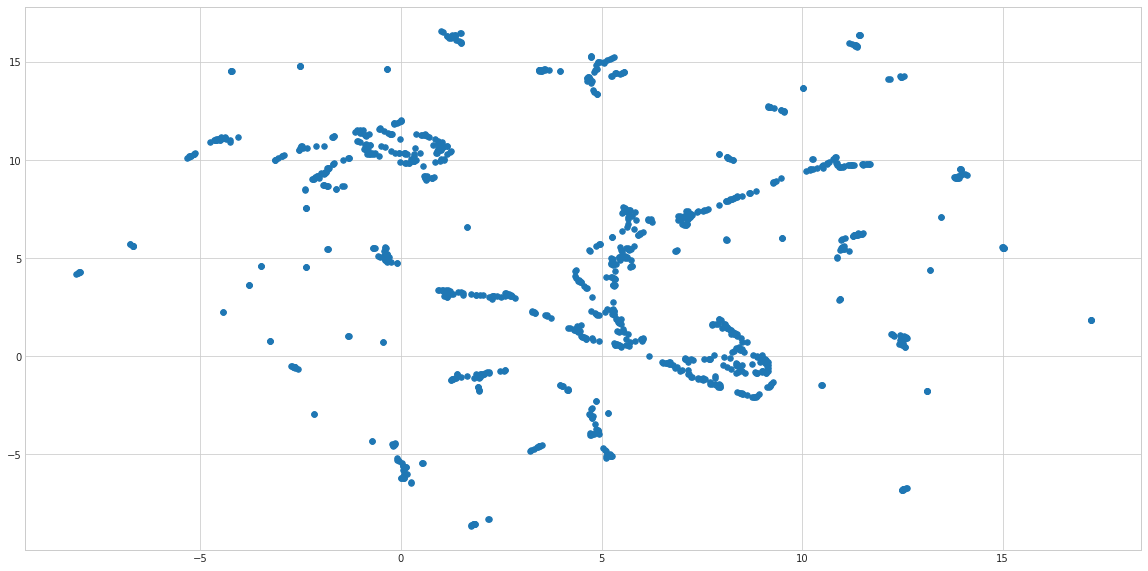

In [ ]:
# Plotting the projection
plt.figure(figsize=(20, 10))
plt.scatter(*embedding[0].T, s=30, cmap='Spectral', alpha=1.0)
plt.show()

Now, were are going to apply the model. 

In [ ]:
# Copy of the data
kprot_data = data_k.copy()

# Choosing categorical variables
categorical_columns = [0, 1, 4]

# Clustering
kproto = KPrototypes(n_clusters= 25, random_state = 2022)
clusters = kproto.fit_predict(kprot_data, categorical=categorical_columns)

# Print how many elements have each cluster
pd.Series(clusters).value_counts()

1     129
14    109
3     101
5      69
21     62
6      60
4      59
12     52
20     51
8      49
22     46
13     42
15     40
23     37
19     37
18     36
2      35
16     34
9      32
0      31
10     29
11     26
17     24
24     19
7      15
dtype: int64

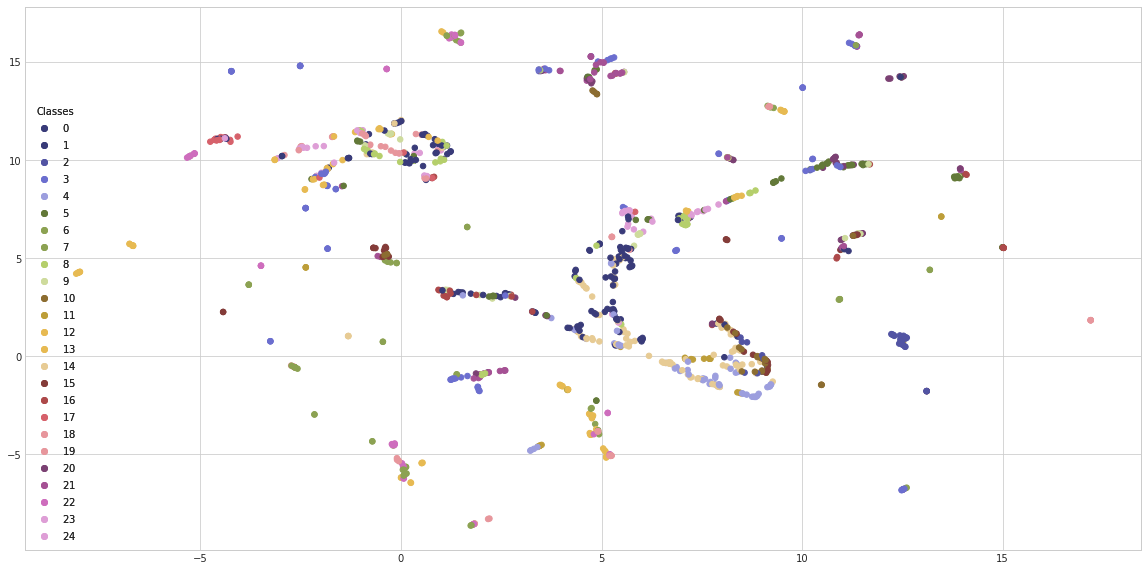

In [ ]:
# Visualizing the clusters (with the projected data)
fig, ax = plt.subplots()
fig.set_size_inches((20, 10))
scatter = ax.scatter(embedding[0][:, 0], embedding[0][:, 1], s=30, c=clusters, cmap='tab20b', alpha=1.0)
legend1 = ax.legend(*scatter.legend_elements(num=25),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

In [ ]:
# Join the cluster with the initial data
data['cluster'] = clusters
data

brand_name                                    model_name       os  \
0          ALCATEL          1 1/8GB Bluish Black (5033D-2JALUAA)  Android   
1          ALCATEL  1 5033D 1/16GB Volcano Black (5033D-2LALUAF)  Android   
2          ALCATEL  1 5033D 1/16GB Volcano Black (5033D-2LALUAF)  Android   
3          ALCATEL  1 5033D 1/16GB Volcano Black (5033D-2LALUAF)  Android   
4            Nokia                           1.3 1/16GB Charcoal  Android   
...            ...                                           ...      ...   
1219         Apple               iPhone XS Max 64GB Gold (MT522)      iOS   
1220         Apple      iPhone XS Max Dual Sim 64GB Gold (MT732)      iOS   
1221        HUAWEI              nova 5T 6/128GB Black (51094MEU)  Android   
1222           ZTE              nubia Red Magic 5G 8/128GB Black  Android   
1223  Sigma mobile                             x-style 35 Screen      NaN   

      popularity  best_price  lowest_price  highest_price  sellers_amount  \
0            422      1690.0        1529.0         1819.0              36   
1            323      1803.0        1659.0         2489.0              36   
2            299      1803.0        1659.0         2489.0              36   
3            287      1803.0        1659.0         2489.0              36   
4           1047      1999.0           NaN            NaN              10   
...          ...         ...           ...            ...             ...   
1219        1101     22685.0       16018.0        27900.0              61   
1220         530     24600.0       21939.0        33720.0              28   
1221        1174      8804.0        7999.0         9999.0              18   
1222         752     18755.0       18500.0        19010.0               2   
1223         952       907.0         785.0          944.0              75   

      screen_size  memory_size  battery_size release_date  cluster  
0            5.00          8.0        2000.0      10-2020        7  
1            5.00         16.0        2000.0       9-2020        3  
2            5.00         16.0        2000.0       9-2020        3  
3            5.00         16.0        2000.0       9-2020        3  
4            5.71         16.0        3000.0       4-2020        3  
...           ...          ...           ...          ...      ...  
1219         6.50         64.0        3174.0       9-2018       10  
1220         6.50         64.0        3174.0       9-2018       10  
1221         6.26        128.0        3750.0      11-2019        1  
1222         6.65        128.0        4500.0      10-2020       14  
1223         3.50          NaN        1750.0       1-2020       22  

[1224 rows x 13 columns]

## Applications

In [ ]:
# Classification internal function

def Clasificador(nombre_marca, os, precio, pantalla, memoria, bateria):
    '''
    Receives

    nombre_marca: Cell phone brand name (string) 
              os: Cell phone system operative (string)
          precio: Cell phone price (float)
        pantalla: Cell phone screen size (float)
         memoria: Cell phone memory size (string)
         bateria: Cell phone battery size (float)
    ---------------------------------------------------
    Returns

    Cluster: The cluster in which it was classified
       Data: The new updated DataFrame

    '''
    assert memoria in data_k['memory_size'].unique(), 'Ingresa el tamaño de memoria Correcta.'
    assert os in data_k['os'].unique(), 'Ingresa un Sistema Operativo Correcto.'
    assert nombre_marca in data_k['brand_name'].unique(), 'Ingresa el nombre Correcto de la Marca.'

    pre = minmax_pre.transform(np.array(precio).reshape(-1, 1))
    pan = minmax_pan.transform(np.array(pantalla).reshape(-1, 1))
    bat = minmax_bat.transform(np.array(bateria).reshape(-1, 1))
    #return pre
    kprot_data = pd.DataFrame([[nombre_marca, os, float(pre[0, 0]), float(pan[0, 0]), memoria, float(bat[0, 0])]])
    #return kprot_data
    cluster = kproto.predict(kprot_data, [0,1,4])[0]
    return cluster, data[data['cluster'] == cluster]

# Recomendation function

def Recomendacion(nombre_marca = None, os = None, precio = None, pantalla = None, memoria = None,
 bateria = None, filtro = 'popularity', ascending=True):
    '''
    Receives

    nombre_marca: Cell phone brand name (string) 
              os: Cell phone system operative (string)
          precio: Cell phone price (float)
        pantalla: Cell phone screen size (float)
         memoria: Cell phone memory size (string)
         bateria: Cell phone battery size (float)
          filtro: Attribute which recommendations are going to be sorted (String)
       ascending: Sorted ascending or descending (Boolean)
    ------------------------------------------------------------------------------
    Returns
    
    DataFrame of the calculated recommendations sorted according to the given filter
    '''

    if nombre_marca is None or nombre_marca not in data_k['brand_name'].unique():
        nombre_marca =  data['brand_name'].mode()[0]
    if os is None or os not in data_k['os'].unique():
        os =  data['os'].mode()[0]
    if precio is None:
        precio =  data['best_price'].median()
    if pantalla is None:
        pantalla =  data['screen_size'].median()
    if memoria is None or memoria not in data_k['memory_size'].unique():
        memoria =  data['memory_size'].mode()[0]
    if bateria is None:
        bateria =  data['battery_size'].median()
    
    pre = minmax_pre.transform(np.array(precio).reshape(-1, 1))
    pan = minmax_pan.transform(np.array(pantalla).reshape(-1, 1))
    bat = minmax_bat.transform(np.array(bateria).reshape(-1, 1))

    kprot_data = pd.DataFrame([[nombre_marca, os, float(pre[0, 0]), float(pan[0, 0]), memoria, 
    float(bat[0, 0])]]) 
    
    cluster = kproto.predict(kprot_data, [0,1,4])[0]

    if filtro not in ['price', 'memory', 'battery', 'popularity']:
        filtro = 'popularity'

    if filtro == 'price':
        filtro = 'best_price'
    
    if filtro == 'memory':
        filtro = 'memory_size'

    if filtro == 'battery':
        filtro = 'battery_size'
    
    if ascending:
        return data[data['cluster'] == cluster].sort_values(filtro).reset_index(drop=True)

    else:
        return data[data['cluster'] == cluster].sort_values(filtro, ascending = False).reset_index(drop=True)


## Tests

1. Test recommendation for a customer looking for a high battery capacity Android cell phone.

In [ ]:
Recomendacion(nombre_marca='Honor', os='Android', memoria=128, ascending=True, filtro = 'battery')

brand_name                                        model_name       os  \
0        Sony                             Xperia 10 I4113 Black  Android   
1       Sharp                            Aquos D10 4/64GB Black  Android   
2       Honor                                    9i 4/64GB Blue  Android   
3          LG                    G7 ThinQ 4/64GB Raspberry Rose  Android   
4          LG                     G7 ThinQ 4/64GB Platinum Gray  Android   
5          LG  G7 ThinQ 4/64GB Moroccan Blue (LMG710EMW.ACISBL)  Android   
6          LG   G7 ThinQ 4/64GB Aurora Black (LMG710EMW.ACISBK)  Android   
7       Honor                                    9i 4/64GB Blue  Android   
8       Honor                                   8 4/64GB (Blue)  Android   
9       Honor                                    8A 3/64GB Blue  Android   
10      Honor                                    8A 3/64GB Blue  Android   
11      Honor                                9 4/64GB Dual Blue  Android   
12       ASUS   Zenfone 5 ZE620KL 4/64GB Blue (ZE620KL-1A012WW)  Android   
13     HUAWEI                  P smart+ 4/64GB Black (51092TFB)  Android   
14     HUAWEI              P smart 2019 3/64GB Black (51093FSW)  Android   
15      Honor                               10 Lite 3/32GB Blue  Android   
16      Honor                              10 Lite 4/64GB Black  Android   
17      Honor                              10 lite 3/128GB Blue  Android   
18      Honor                              10 lite 3/64GB Black  Android   
19      Honor                                   10 6/64GB Black  Android   
20      Honor                               10 lite 3/64GB Blue  Android   
21      Honor                      10i 4/128GB Black (51093VQV)  Android   
22      Honor                       10i 4/128GB Blue (51093VQX)  Android   
23      Honor                              10 lite 3/64GB Black  Android   
24     Lenovo                               S5 Pro 6/64GB Black  Android   
25     Lenovo                                S5 Pro 6/64Gb Blue  Android   
26     Lenovo                                S5 Pro 6/64Gb Gold  Android   
27      Nokia                          X7 Dual Sim 6/64GB Black  Android   
28      Honor                       V10 6/128GB Dual Beach Gold  Android   
29      Honor                                     V9 6/64GB Red  Android   
30      Honor                                     V9 6/64GB Red  Android   
31      Honor                               8x Max 4/64GB Black  Android   
32      Honor                                8x Max 4/64GB Blue  Android   
33      Honor                               8x Max 4/64GB Black  Android   

    popularity  best_price  lowest_price  highest_price  sellers_amount  \
0          950      5599.0           NaN            NaN               1   
1          632      7827.0        6199.0         9999.0               7   
2          216      4009.0           NaN            NaN               1   
3          427      5798.0        5599.0         5998.0               2   
4          851      5713.0        5566.0         5998.0               3   
5          923      5421.0        5266.0         5576.0               2   
6         1030      5571.0        5566.0         5576.0               2   
7          180      4009.0           NaN            NaN               1   
8          693      3499.0           NaN            NaN               1   
9          430      3844.0        3690.0         3999.0               2   
10         433      3844.0        3690.0         3999.0               2   
11         660      4461.0        3978.0         5957.0               5   
12         893      5663.0        5528.0         5799.0               2   
13         500      5380.0           NaN            NaN               1   
14         825      4262.0        3845.0         4990.0              11   
15         424      3999.0           NaN            NaN               2   
16         134      4973.0        4733.0         5295.0            

2. Test recommendation for a customer looking for a cell phone with a specific memory capacity, similar to the Huawei brand.

In [ ]:
Recomendacion(nombre_marca='Huawei', os='Android', memoria=64, ascending=True, filtro = 'memory')

brand_name                                         model_name       os  \
0     Samsung  Galaxy A12 SM-A125F 4/64GB Black (SM-A125FZKVSEK)  Android   
1         AGM                                    X3 6/64GB Black  Android   
2         CAT                                          S61 Black  Android   
3         CAT                                                S52  Android   
4      Google                     Pixel 4 XL 6/64GB Oh So Orange  Android   
5      Google                          Pixel 4 6/64GB Just Black  Android   
6      Google                      Pixel 3a XL 4/64GB Just Black  Android   
7      Google                       Pixel 3 XL 4/64GB Just Black  Android   
8      Google                         Pixel 2 XL 64GB Just Black  Android   
9      HUAWEI                            Mate 20 DS 6/64GB Black  Android   
10    Samsung     Galaxy S9+ SM-G965 DS 64GB Black (SM-G965FZKD)  Android   
11    Samsung      Galaxy S9 SM-G960 DS 64GB Black (SM-G960FZKD)  Android   
12    Samsung                     Galaxy S8+ SM-G955U 64GB Black  Android   
13    Samsung                Galaxy S8+ 64GB Black (SM-G955FZKD)  Android   
14        AGM                                    X3 8/64GB Black  Android   
15    Samsung              Galaxy S8 G950F Single Sim 64GB Black  Android   
16    Samsung                            Galaxy Note 8 64GB Gold  Android   
17    Samsung          Galaxy M30 SM-M305F 4/64GB Gradation Blue  Android   
18    Samsung              Galaxy M21 4/64GB Black (SM-M215FZKU)  Android   
19    Samsung                 Galaxy A8+ 2018 4/64GB Orchid Gray  Android   
20    Samsung           Galaxy A7 2018 4/64GB Blue (SM-A750FZBU)  Android   
21    Samsung          Galaxy A7 2018 4/64GB Black (SM-A750FZKU)  Android   
22    Samsung         Galaxy A51 2020 4/64GB Black (SM-A515FZKU)  Android   
23    Samsung  Galaxy A50 2019 SM-A505F 4/64GB Blue (SM-A505F...  Android   
24    Samsung              Galaxy A41 4/64GB Black (SM-A415FZKD)  Android   
25    Samsung              Galaxy A31 4/64GB Black (SM-A315FZKU)  Android   
26    Samsung             Galaxy A30s 4/64GB Green (SM-A307FZGV)  Android   
27    Samsung                          Galaxy A30s 4/128GB White  Android   
28    Samsung                          Galaxy A30s 4/128GB White  Android   
29    Samsung                                Galaxy S8 64GB Blue  Android   
30        AGM                                    X3 8/64GB Black  Android   

    popularity  best_price  lowest_price  highest_price  sellers_amount  \
0         1092      4977.0        4598.0         5499.0              57   
1          831     11278.0        9999.0        12376.0               7   
2          777     25649.0       18730.0        31317.0              53   
3          784     13259.0       11190.0        17896.0              39   
4         1019     19369.0       16600.0        22999.0               4   
5         1065     17187.0       15944.0        19409.0              21   
6          510     11774.0        9577.0        12999.0               9   
7         1082     11238.0        8399.0        12999.0              29   
8         1050     12909.0        5999.0        17421.0               8   
9          566     13612.0       13255.0        13969.0               2   
10        1135     13837.0       10048.0        17966.0              16   
11        1105     11207.0        9050.0        13880.0               5   
12         664      8709.0           NaN            NaN               1   
13         871     10787.0        8299.0        12898.0               7   
14         213     15048.0           NaN            NaN               1   
15         886      7640.0           NaN            NaN               1   
16         744      9923.0        9250.0        10598.0               3   
17         443      6749.0        5950.0         7838.0               5   
18        1204      5849.0        5228.0         6181.0              67   
19         143      6542.0           N

3. Request to classify a new OnePlus branded cell phone, with OxygenOS operating system.

In [ ]:
# Number of cluster
Clasificador('OnePlus', 'OxygenOS', 7000, 6.1, 128, 2700)[0]

1

In [ ]:
# Cellphones in the cluster
Clasificador('OnePlus', 'OxygenOS', 7000, 6.1, 128, 2700)[1]

brand_name                               model_name       os  popularity  \
43        Meizu                 16Xs 6/128GB Pearl White  Android         900   
48      ALCATEL  1SE 4/128GB Agate Green (5030E-2BALUA2)  Android         790   
49      ALCATEL  1SE 4/128GB Agate Green (5030E-2BALUA2)  Android         793   
53        Honor                         20 6/128GB Black  Android         823   
66       realme                 3 Pro 6/128GB Nitro Blue  Android         103   
...         ...                                      ...      ...         ...   
1007     realme              X50 5G 6/128GB Jungle Green  Android         679   
1014      Nokia                X7 Dual Sim 6/128GB Black  Android         250   
1039       Sony                Xperia 10 II 4/128GB Mint  Android        1143   
1058       vivo                        Y19 4/128GB Black  Android         739   
1221     HUAWEI         nova 5T 6/128GB Black (51094MEU)  Android        1174   

      best_price  lowest_price  highest_price  sellers_amount  screen_size  \
43        7229.0        6840.0         7786.0              11         6.20   
48        3877.0        3581.0         3899.0              35         6.22   
49        3877.0        3581.0         3899.0              35         6.22   
53        9999.0           NaN            NaN               1         6.26   
66        7068.0           NaN            NaN               1         6.30   
...          ...           ...            ...             ...          ...   
1007      9049.0        8999.0         9099.0               2         6.57   
1014      7515.0        7357.0         7757.0               4         6.18   
1039     10887.0       10319.0        11990.0              15         6.00   
1058      4998.0        4997.0         4999.0               2         6.53   
1221      8804.0        7999.0         9999.0              18         6.26   

      memory_size  battery_size release_date  cluster  
43          128.0        4000.0      11-2020        1  
48          128.0        4000.0      10-2020        1  
49          128.0        4000.0      10-2020        1  
53          128.0        3750.0       7-2019        1  
66          128.0        4045.0      10-2019        1  
...           ...           ...          ...      ...  
1007        128.0        4200.0      10-2020        1  
1014        128.0        3500.0      10-2019        1  
1039        128.0        3600.0       8-2020        1  
1058        128.0        5000.0      12-2019        1  
1221        128.0        3750.0      11-2019        1  

[129 rows x 13 columns]

![title](/work/Marca/Datans_Logo.png)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0d10776f-00cf-4907-9711-4bb53094c88e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>